In [1]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from itertools import permutations 
from time import time
import scipy

In [2]:
# Dataset 1

# Generating a 2 dimensional synthetic datatset for 2 class classification
X1, y1 = make_classification(
    n_samples=1000, 
    n_features=2, 
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=26,
    class_sep=5
)

df1 = pd.concat([pd.DataFrame(X1), pd.Series(y1)], axis=1)
df1.columns = ['x1', 'x2', 'y']
# 5 random rows
df1.head(5)

,x1,x2,y
0,-5.168867,-5.068865,1
1,-3.985204,-7.119725,1
2,5.802822,5.586125,0
3,5.650932,5.550041,0
4,2.645435,4.394390,0


In [3]:
# Dataset 2

# Generating a 2 dimensional synthetic datatset for 2 class classification
X2, y2 = make_classification(
    n_samples=1000, 
    n_features=2, 
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=26,
    class_sep=2
)

df2 = pd.concat([pd.DataFrame(X2), pd.Series(y2)], axis=1)
df2.columns = ['x1', 'x2', 'y']
# 5 random rows
df2.head(5)

,x1,x2,y
0,-2.168867,-2.068865,1
1,-0.985204,-4.119725,1
2,2.802822,2.586125,0
3,2.650932,2.550041,0
4,-0.354565,1.394390,0


In [4]:
# Plotting the dataset
def plot(df: pd.DataFrame, x1: str, x2: str, y: str, title: str = '', save: bool = False, figname='figure.png'):
    plt.figure(figsize=(14, 7))
    plt.scatter(x=df[df[y] == 0][x1], y=df[df[y] == 0][x2], label='y = 0')
    plt.scatter(x=df[df[y] == 1][x1], y=df[df[y] == 1][x2], label='y = 1')
    plt.title(title, fontsize=20)
    plt.legend()
    if save:
        plt.savefig(figname, dpi=300, bbox_inches='tight', pad_inches=0)
    plt.show()

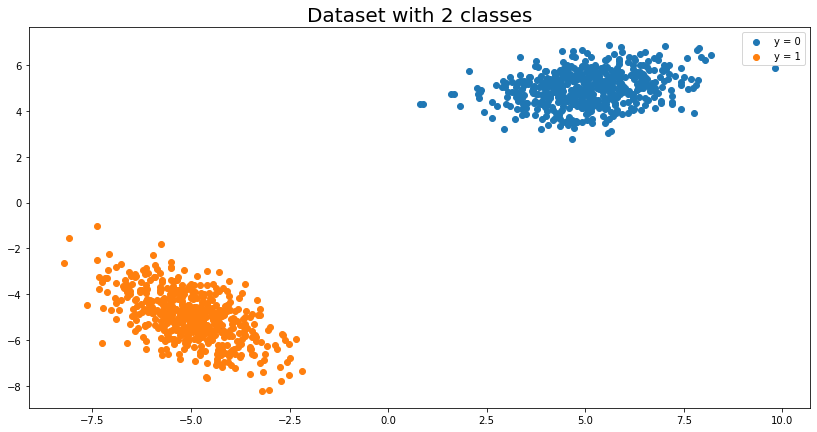

In [5]:
# Plotting Dataset 1

plot(df=df1, x1='x1', x2='x2', y='y', title='Dataset with 2 classes')

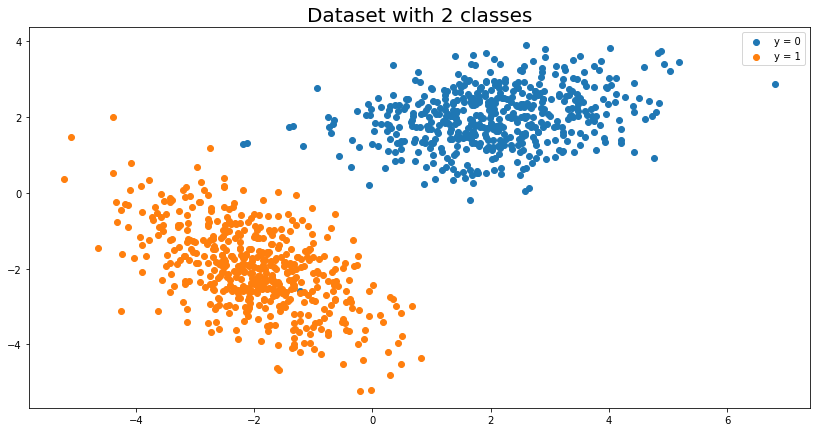

In [6]:
# Plotting Dataset 2

plot(df=df2, x1='x1', x2='x2', y='y', title='Dataset with 2 classes')

In [ ]:
# specify pdf functions for dataset specify covariance and then do random draws 
# use numpy.random.generate

# p(x), p(y|x), p(x|y), p(y)
# specify p(x,y)
# We want to change p(x) and keep p(y) constant
# cov matrix have to be symmteric and positive definite

In [7]:
# Take a sample of data for one variable and fit a data distribution
def fit_distribution(data):
    # estimate parameters
    mu = np.mean(data)
    sigma = np.std(data)
    print(mu, sigma)
    # fit distribution
    dist = scipy.stats.norm(mu, sigma)
    x_axis = np.arange(-10,10,0.1)
    plt.plot(x_axis,scipy.stats.norm.pdf(x_axis,mu,sigma))
    plt.show()
    return dist

In [8]:
# calculate the independent conditional probability
def probability(X, prior, dist1, dist2):
    return prior * dist1.pdf(X[0]) * dist2.pdf(X[1])

(502, 2) (498, 2) 

0.502 0.498 

distX1y0: 

(502,)
5.006839288823336 1.3827996422319808


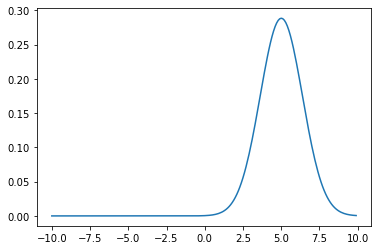

distX2y0: 

4.946084001025817 0.9918266097521149


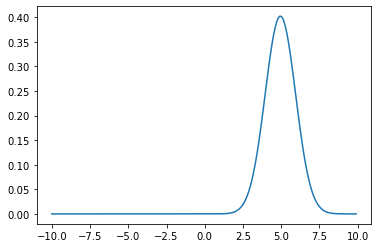

distX1y1: 

-5.000602008895679 1.024288343136691


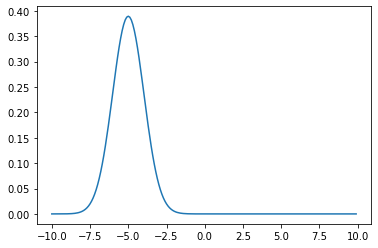

distX2y1: 

-4.994637468708116 1.1072844367731418


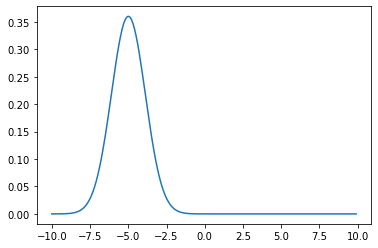

P(y=0 | [-5.16886679 -5.06886468]) = 0.000
P(y=1 | [-5.16886679 -5.06886468]) = 6.879
Truth: y=1


In [9]:
# Working for Dataset 1

# sort data into classes
Xy0_1 = X1[y1 == 0]
Xy1_1 = X1[y1 == 1]
print(Xy0_1.shape, Xy1_1.shape,'\n')

# calculate priors
priory0_1 = len(Xy0_1) / len(X1) #P(y=0)
priory1_1 = len(Xy1_1) / len(X1) #P(y=1)
print(priory0_1, priory1_1,'\n')

# create PDFs for y==0
print('distX1y0:','\n')
print(Xy0_1[:, 0].shape)
distX1y0_1 = fit_distribution(Xy0_1[:, 0])
print('distX2y0:','\n')
distX2y0_1 = fit_distribution(Xy0_1[:, 1])

# create PDFs for y==1
print('distX1y1:','\n')
distX1y1_1 = fit_distribution(Xy1_1[:, 0])
print('distX2y1:','\n')
distX2y1_1 = fit_distribution(Xy1_1[:, 1])

# classify one example
Xsample_1, ysample_1 = X1[0], y1[0]
py0_1 = probability(Xsample_1, priory0_1, distX1y0_1, distX2y0_1)
py1_1 = probability(Xsample_1, priory1_1, distX1y1_1, distX2y1_1)
print('P(y=0 | %s) = %.3f' % (Xsample_1, py0_1*100))
print('P(y=1 | %s) = %.3f' % (Xsample_1, py1_1*100))
print('Truth: y=%d' % ysample_1)

(502, 2) (498, 2) 

0.502 0.498 

distX1y0: 

2.0307436712934552 1.2579839497408019


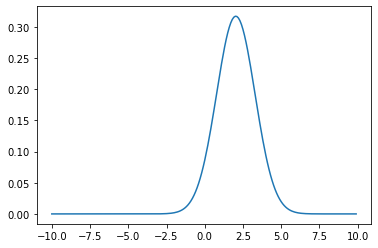

distX2y0: 

1.9699883834959357 0.8008410462851311


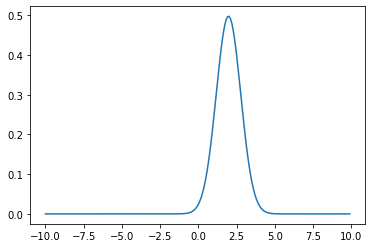

distX1y1: 

-2.0006020088956795 1.024288343136691


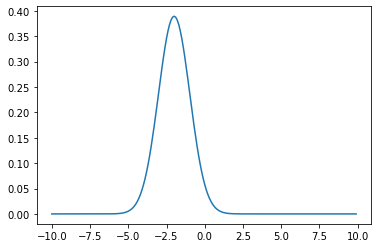

distX2y1: 

-1.9946374687081156 1.1072844367731418


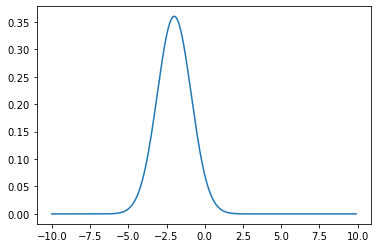

P(y=0 | [-2.16886679 -2.06886468]) = 0.000
P(y=1 | [-2.16886679 -2.06886468]) = 6.879
Truth: y=1


In [10]:
# Working for Dataset 2

# sort data into classes
Xy0_2 = X2[y2 == 0]
Xy1_2 = X2[y2 == 1]
print(Xy0_2.shape, Xy1_2.shape,'\n')

# calculate priors
priory0_2 = len(Xy0_2) / len(X2) #P(y=0)
priory1_2 = len(Xy1_2) / len(X2) #P(y=1)
print(priory0_2, priory1_2,'\n')

# create PDFs for y==0
print('distX1y0:','\n')
distX1y0_2 = fit_distribution(Xy0_2[:, 0])
print('distX2y0:','\n')
distX2y0_2 = fit_distribution(Xy0_2[:, 1])

# create PDFs for y==1
print('distX1y1:','\n')
distX1y1_2 = fit_distribution(Xy1_2[:, 0])
print('distX2y1:','\n')
distX2y1_2 = fit_distribution(Xy1_2[:, 1])

# classify one example
Xsample_2, ysample_2 = X2[0], y2[0]
py0_2 = probability(Xsample_2, priory0_2, distX1y0_2, distX2y0_2)
py1_2 = probability(Xsample_2, priory1_2, distX1y1_2, distX2y1_2)
print('P(y=0 | %s) = %.3f' % (Xsample_2, py0_2*100))
print('P(y=1 | %s) = %.3f' % (Xsample_2, py1_2*100))
print('Truth: y=%d' % ysample_2)

In [11]:
class subspace:
    def __init__(self,dataset,S,T,d):
        self.dataset = dataset
        self.S = S
        self.T = T
        self.d = d
#         print(self.S)
    def pca(self,x, n_components):
        cov = np.cov(x , rowvar = False)
        eigen_values , eigen_vectors = np.linalg.eigh(cov)
        sorted_index = np.argsort(eigen_values)[::-1]
        sorted_eigenvalue = eigen_values[sorted_index]
        sorted_eigenvectors = eigen_vectors[:,sorted_index]
        return sorted_eigenvectors[:,0:n_components]
    def fit_predict(self):
        #normalising the data
        scale = StandardScaler()
        x_S = self.S.iloc[:,:2]
        x_T = self.T.iloc[:,:2]
        x_T = scale.fit_transform(x_T)
        x_S = scale.fit_transform(x_S)
        
#         print(x_S)
#         print(x_T)
        
        y_S = self.S.iloc[:,-1]
        y_T = self.T.iloc[:,-1]
#         print(y_S)
#         print(y_T)
        
        #pca and picking the top eigen vectors
        xs = self.pca(x_S,self.d)
        xt = self.pca(x_T,self.d)
        xa = np.dot(np.dot(xs,xs.T),xt)
        sa = np.dot(x_S,xa)
        st = np.dot(x_T,xt)
        
        #gnb classifier
        gnb = GaussianNB()
        gnb.fit(sa,y_S)
        labels = gnb.predict(st)
        return accuracy_score(labels,y_T)
    
def gnb(dataset,S,T):
    
    x_S = S.iloc[:,:1]
    x_T = S.iloc[:,:1]
    y_S = S.iloc[:,-1]
    y_T = T.iloc[:,-1]
    scale = StandardScaler()
    x_S = scale.fit_transform(x_S)
    x_T = scale.fit_transform(x_T)
    gnb = GaussianNB()
    gnb.fit(x_S,y_S)
    labels = gnb.predict(x_T)
    return accuracy_score(labels,y_T)

In [12]:
data_list = [df1,df2]
data_iter = list(permutations(data_list,2))
# data_iter

In [13]:
list1 = ["dist1","dist2"]
index = list(permutations(list1,2))
# print(index)
methods = ["subspace","without subspace"]
data_timedf = pd.DataFrame(index=index,columns=methods)
data_accdf = pd.DataFrame(index=index,columns=methods)

for i in range(len(index)):
    t0 = time()
    sub = subspace(df1,data_iter[i][0],data_iter[i][1],2)
    data_accdf.iloc[i,0] = sub.fit_predict()*100
    t1 = time()
    data_timedf.iloc[i,0] = t1-t0
    t2 = time()
    data_accdf.iloc[i,1] = gnb(df1,data_iter[i][0],data_iter[i][1])*100
    t3 = time()
    data_timedf.iloc[i,1] = t3-t2

In [14]:
data_accdf

,subspace,without subspace
"(dist1, dist2)",99.5,99.8
"(dist2, dist1)",99.8,96.4


In [15]:
data_timedf

,subspace,without subspace
"(dist1, dist2)",0.007084,0.005226
"(dist2, dist1)",0.003598,0.003366
